In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
import pandas as pd
df=pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.shape

(51717, 17)

In [6]:
df.drop_duplicates(inplace = True)
df.shape

(51717, 17)

In [7]:
df=df.drop(["url","address","phone","menu_item","reviews_list","dish_liked","listed_in(city)"],axis = 1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [8]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
df["rate"].isnull().sum()

7775

In [13]:
def correct_rate(value):
    if(value == "NEW" or value =="-"):
        return np.nan
    value = str(value)
    value =value.split("/")
    return float(value[0])



           

df["rate"]=df["rate"].apply(correct_rate)
df["rate"]

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [14]:
rate_mean = df["rate"].mean()


In [15]:
rate_mean

3.700448817952718

In [16]:
df=df.fillna(rate_mean)

In [18]:
df["rate"].isnull().sum()

0

In [25]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          51717 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51717 non-null  object 
 6   rest_type     51717 non-null  object 
 7   cuisines      51717 non-null  object 
 8   cost2plate    51717 non-null  object 
 9   type          51717 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.3+ MB


In [27]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost2plate      0
type            0
dtype: int64

In [100]:
df["votes"].count()

51717

In [101]:
df["votes"].nunique()

2328

In [102]:
df["location"].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [103]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    346
listed_in(type)                  0
dtype: int64

In [21]:
df.dropna(inplace = True)


In [105]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [22]:
df.rename(columns = {"approx_cost(for two people)":"cost2plate","listed_in(type)":"type"},inplace = True)
df.head()

#in this dataset we dont have any null value


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [28]:
df["cost2plate"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', 3.700448817952718,
       '1,400', '180', '1,350', '2,200', '2,000', '1,800', '1,900', '330',
       '2,500', '2,100', '3,000', '2,800', '3,400', '40', '1,250',
       '3,500', '4,000', '2,400', '2,600', '120', '1,450', '469', '70',
       '3,200', '60', '560', '240', '360', '6,000', '1,050', '2,300',
       '4,100', '5,000', '3,700', '1,650', '2,700', '4,500', '140'],
      dtype=object)

In [31]:
df["cost2plate"].dtypes

dtype('O')

In [33]:
def correct_cost2plate(value):
    if ("," in value):
        value = str(value)
        value=value.replace(",","")
        return float(value)
        
       
    else:
        return float(value)
    
df["cost2plate"] = df["cost2plate"].apply(correct_cost2plate)   
df["cost2plate"]

TypeError: argument of type 'float' is not iterable

In [109]:
df["cost2plate"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [110]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [111]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [112]:
df["online_order"].count()

51148

In [113]:
df.shape

(51148, 10)

In [114]:
df["location"].value_counts()

BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [115]:
df1 = df.copy()

In [116]:
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [117]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost2plate      0
type            0
dtype: int64

In [118]:
rest_type = df["rest_type"].value_counts(ascending = False)
rest_type

Quick Bites                   19046
Casual Dining                 10273
Cafe                           3687
Delivery                       2578
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [119]:
type(rest_type)

pandas.core.series.Series

In [120]:
rest_type_less_1000 = rest_type[rest_type<1000]
rest_type_less_1000 

Beverage Shop                 865
Bar                           686
Food Court                    619
Sweet Shop                    468
Bar, Casual Dining            415
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [121]:
def rest_type_outliers(value):
    if(value in rest_type_less_1000):
        return "others"
    else:
        return value
    
df["rest_type"] = df["rest_type"].apply(rest_type_outliers)    
df["rest_type"]

0        Casual Dining
1        Casual Dining
2               others
3          Quick Bites
4        Casual Dining
             ...      
51712           others
51713           others
51714           others
51715           others
51716           others
Name: rest_type, Length: 51148, dtype: object

In [122]:
df["rest_type"].value_counts(ascending = False)

Quick Bites           19046
Casual Dining         10273
others                 9028
Cafe                   3687
Delivery               2578
Dessert Parlor         2245
Takeaway, Delivery     2014
Bakery                 1141
Casual Dining, Bar     1136
Name: rest_type, dtype: int64

In [123]:
location_type = df["location"].value_counts()
location_type

BTM                      5071
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [124]:
location_type_less_300 = location_type[location_type<300]
location_type_less_300
#yaha pass buisness kholne me fayda toh hoga


Koramangala 8th Block            294
Vasanth Nagar                    293
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            216
Thippasandra                     191
Kumaraswamy Layout               191
Nagawara                         187
Basaveshwara Nagar               187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    151
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
South Bangalore                  107
Koramangala 2nd Block            102
Hosur Road                       102
Kaggadasapura                    101
CV Raman Nagar                    90
Vijay Nagar                       78
RT Nagar                          78
S

In [125]:
def location_outliers(value):
    if(value in location_type_less_300):
        return "others"
    else:
        return value
        
df["location"]=df["location"].apply(location_outliers)
df["location"].value_counts()

BTM                      5071
others                   4962
HSR                      2496
Koramangala 5th Block    2481
JP Nagar                 2219
Whitefield               2109
Indiranagar              2033
Jayanagar                1916
Marathahalli             1808
Bannerghatta Road        1611
Bellandur                1271
Electronic City          1248
Koramangala 1st Block    1237
Brigade Road             1218
Koramangala 7th Block    1176
Koramangala 6th Block    1129
Sarjapur Road            1049
Koramangala 4th Block    1017
Ulsoor                   1017
Banashankari              904
MG Road                   894
Kalyan Nagar              841
Richmond Road             804
Malleshwaram              724
Frazer Town               720
Basavanagudi              684
Residency Road            674
Brookefield               656
Banaswadi                 645
New BEL Road              644
Kammanahalli              640
Rajajinagar               591
Church Street             569
Lavelle Ro

In [126]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [128]:
df["cuisines"].nunique()

2704

In [130]:
df["cuisines"].value_counts()

North Indian                                 2858
North Indian, Chinese                        2355
South Indian                                 1822
Biryani                                       906
Bakery, Desserts                              899
                                             ... 
Beverages, Burger                               1
North Indian, Mughlai, Lucknowi                 1
Continental, Thai, North Indian, Chinese        1
North Indian, Bengali, Chinese, Beverages       1
North Indian, Chinese, Arabian, Momos           1
Name: cuisines, Length: 2704, dtype: int64

In [138]:
cuisines = df["cuisines"].value_counts()

In [139]:
cuisines_less_100=cuisines[cuisines<100] #this way we are creating the cluster less than 100 values
cuisines_less_100

North Indian, Continental, Chinese           97
Juices                                       94
Bengali, North Indian                        93
Fast Food, North Indian                      93
Tibetan, Momos                               90
                                             ..
Beverages, Burger                             1
North Indian, Mughlai, Lucknowi               1
Continental, Thai, North Indian, Chinese      1
North Indian, Bengali, Chinese, Beverages     1
North Indian, Chinese, Arabian, Momos         1
Name: cuisines, Length: 2635, dtype: int64

In [140]:
def cuisines_outliers(value):
    if(value in cuisines_less_100):
        return "others"
    else:
        return value
    
df["cuisines"] = df["cuisines"].apply(cuisines_outliers)
df["cuisines"].value_counts()

others                                 26220
North Indian                            2858
North Indian, Chinese                   2355
South Indian                            1822
Biryani                                  906
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [142]:
df["cuisines"].unique()

array(['North Indian, Mughlai, Chinese', 'others',
       'South Indian, North Indian', 'North Indian', 'Cafe',
       'Cafe, Continental', 'Cafe, Fast Food', 'Cafe, Bakery',
       'Bakery, Desserts', 'Pizza', 'Biryani',
       'North Indian, Chinese, Fast Food', 'Chinese, Thai, Momos',
       'South Indian', 'Burger, Fast Food', 'Pizza, Fast Food',
       'North Indian, Chinese', 'Chinese, Thai', 'Ice Cream, Desserts',
       'Biryani, Fast Food', 'Fast Food, Burger', 'Desserts, Beverages',
       'Chinese', 'Bakery', 'Biryani, South Indian', 'Fast Food',
       'South Indian, Chinese, North Indian', 'Mithai, Street Food',
       'South Indian, Chinese', 'Biryani, North Indian, Chinese',
       'Desserts', 'Ice Cream', 'South Indian, North Indian, Chinese',
       'South Indian, Biryani', 'Beverages', 'Mithai',
       'North Indian, Street Food', 'Chinese, North Indian',
       'South Indian, North Indian, Chinese, Street Food', 'Andhra',
       'Italian, Pizza', 'Street Food', 'Arab

In [143]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [144]:
df["name"].value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Mast Biryani - Night Express                                1
Kings Court Daba                                            1
New Prakash Hotel                                           1
Taja Coffee                                                 1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8723, dtype: int64

In [145]:
df["type"].value_counts() #no outliers in this

Delivery              25653
Dine-out              17583
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  871
Pubs and bars           688
Name: type, dtype: int64

In [147]:
df["votes"].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843])

In [148]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost2plate      0
type            0
dtype: int64

Data is clean now we need to visulaztion the data


In [149]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [152]:
import seaborn as sns


<Axes: xlabel='online_order', ylabel='count'>

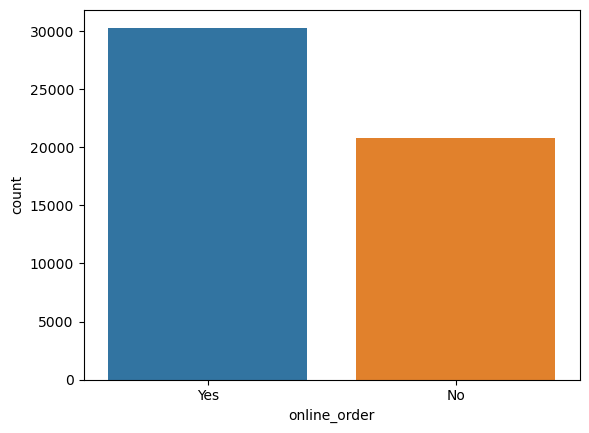

In [158]:
sns.countplot(x = "online_order",data = df)

<Axes: xlabel='book_table', ylabel='count'>

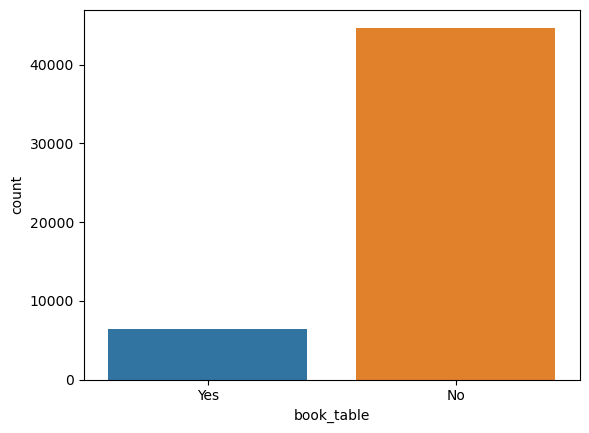

In [159]:
sns.countplot(x = "book_table",data = df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

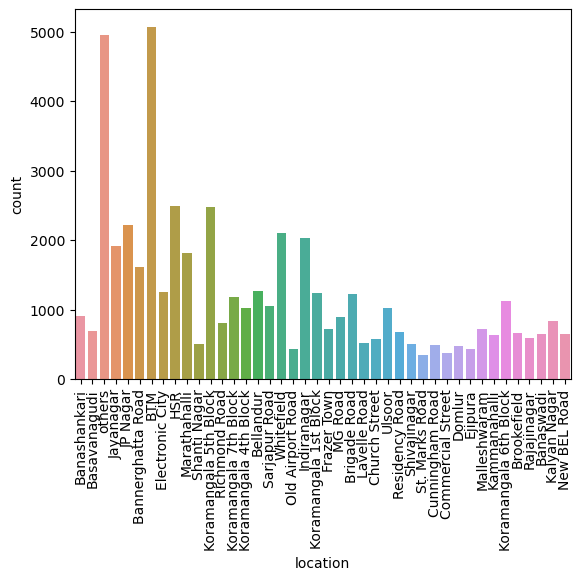

In [162]:
sns.countplot(x= "location",data = df)
plt.xticks(rotation = 90)

<Axes: xlabel='online_order', ylabel='rate'>

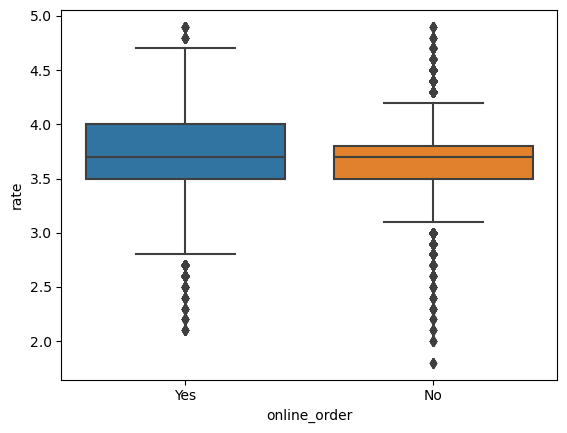

In [163]:
sns.boxplot(x = "online_order",y = "rate",data = df)

<Axes: xlabel='book_table', ylabel='rate'>

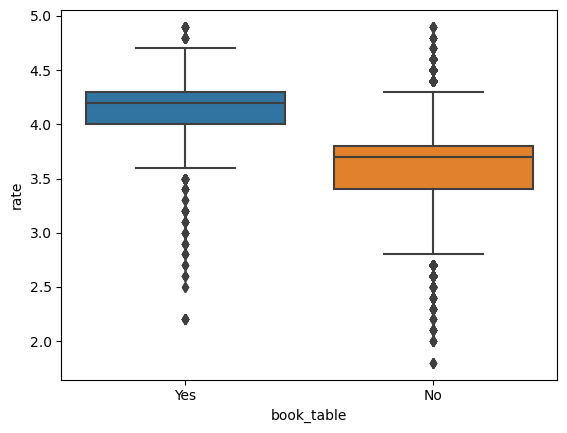

In [164]:
sns.boxplot(x = "book_table",y = "rate",data = df)

In [165]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [173]:
df2=df.groupby(["location","online_order"])["name"].count()
df2.to_csv("location_online_order.csv")
df2=pd.read_csv("/kaggle/working/location_online_order.csv")
df2=pd.pivot_table(df2,index = ["location"],columns = ["online_order"])
df2

name      
online_order             No   Yes
location                         
BTM                    1766  3305
Banashankari            397   507
Banaswadi               302   343
Bannerghatta Road       687   924
Basavanagudi            243   441
Bellandur               519   752
Brigade Road            553   665
Brookefield             239   417
Church Street           226   343
Commercial Street       228   142
Cunningham Road         168   323
Domlur                  247   235
Ejipura                 214   220
Electronic City         676   572
Frazer Town             288   432
HSR                     585  1911
Indiranagar             701  1332
JP Nagar                911  1308
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            265   375
Koramangala 1st Block   384   853
Koramangala 4th Block   459   558
Koramangala 5th Block   867  1614
Koramangala 6th Block   445   684
Koramangala 7th Block   390   786
Lavelle Road            317   206
MG Road                 520   374
Malleshwaram            309   415
Marathahalli            701  1107
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          426   248
Richmond Road           557   247
Sarjapur Road           324   725
Shanti Nagar            289   222
Shivajinagar            354   145
St. Marks Road          176   167
Ulsoor                  389   628
Whitefield              986  1123
others                 2065  2897

<Axes: xlabel='location'>

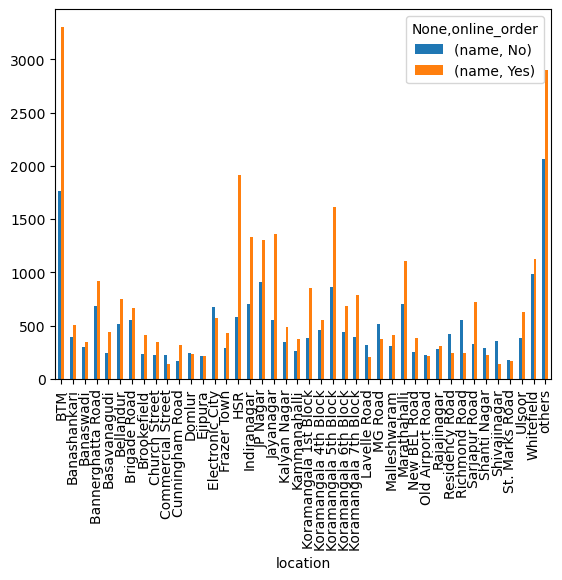

In [175]:
df2.plot(kind = "bar")

In [182]:
df3=df.groupby(["location","book_table"])["name"].count()
df3.to_csv("location_online_order.csv")
df3=pd.read_csv("location_online_order.csv")
df3=pd.pivot_table(df3,index = ["location"],columns = ["book_table"])
df3





name       
book_table                 No    Yes
location                            
BTM                    4903.0  168.0
Banashankari            840.0   64.0
Banaswadi               637.0    8.0
Bannerghatta Road      1512.0   99.0
Basavanagudi            668.0   16.0
Bellandur              1173.0   98.0
Brigade Road           1039.0  179.0
Brookefield             582.0   74.0
Church Street           387.0  182.0
Commercial Street       370.0    NaN
Cunningham Road         316.0  175.0
Domlur                  427.0   55.0
Ejipura                 434.0    NaN
Electronic City        1149.0   99.0
Frazer Town             712.0    8.0
HSR                    2279.0  217.0
Indiranagar            1579.0  454.0
JP Nagar               1904.0  315.0
Jayanagar              1637.0  279.0
Kalyan Nagar            692.0  149.0
Kammanahalli            591.0   49.0
Koramangala 1st Block  1187.0   50.0
Koramangala 4th Block   695.0  322.0
Koramangala 5th Block  1789.0  692.0
Koramangala 6th Block  1016.0  113.0
Koramangala 7th Block  1012.0  164.0
Lavelle Road            291.0  232.0
MG Road                 547.0  347.0
Malleshwaram            635.0   89.0
Marathahalli           1642.0  166.0
New BEL Road            588.0   56.0
Old Airport Road        378.0   59.0
Rajajinagar             550.0   41.0
Residency Road          523.0  151.0
Richmond Road           688.0  116.0
Sarjapur Road           893.0  156.0
Shanti Nagar            453.0   58.0
Shivajinagar            476.0   23.0
St. Marks Road          219.0  124.0
Ulsoor                  840.0  177.0
Whitefield             1856.0  253.0
others                 4590.0  372.0

<Axes: xlabel='location'>

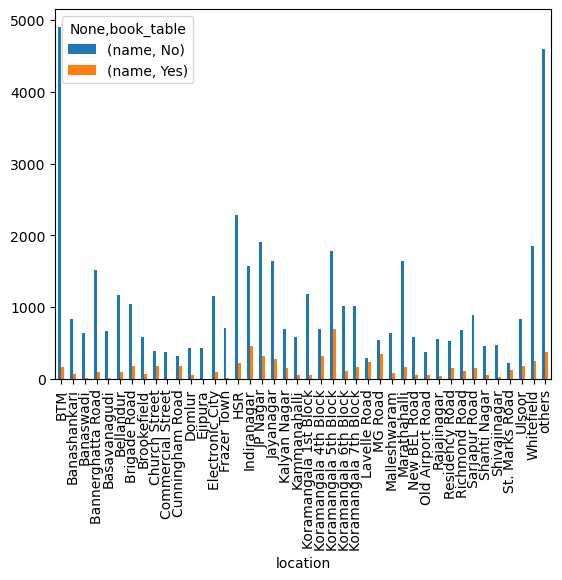

In [184]:
df3.plot(kind = "bar")

<Axes: xlabel='rest_type', ylabel='rate'>

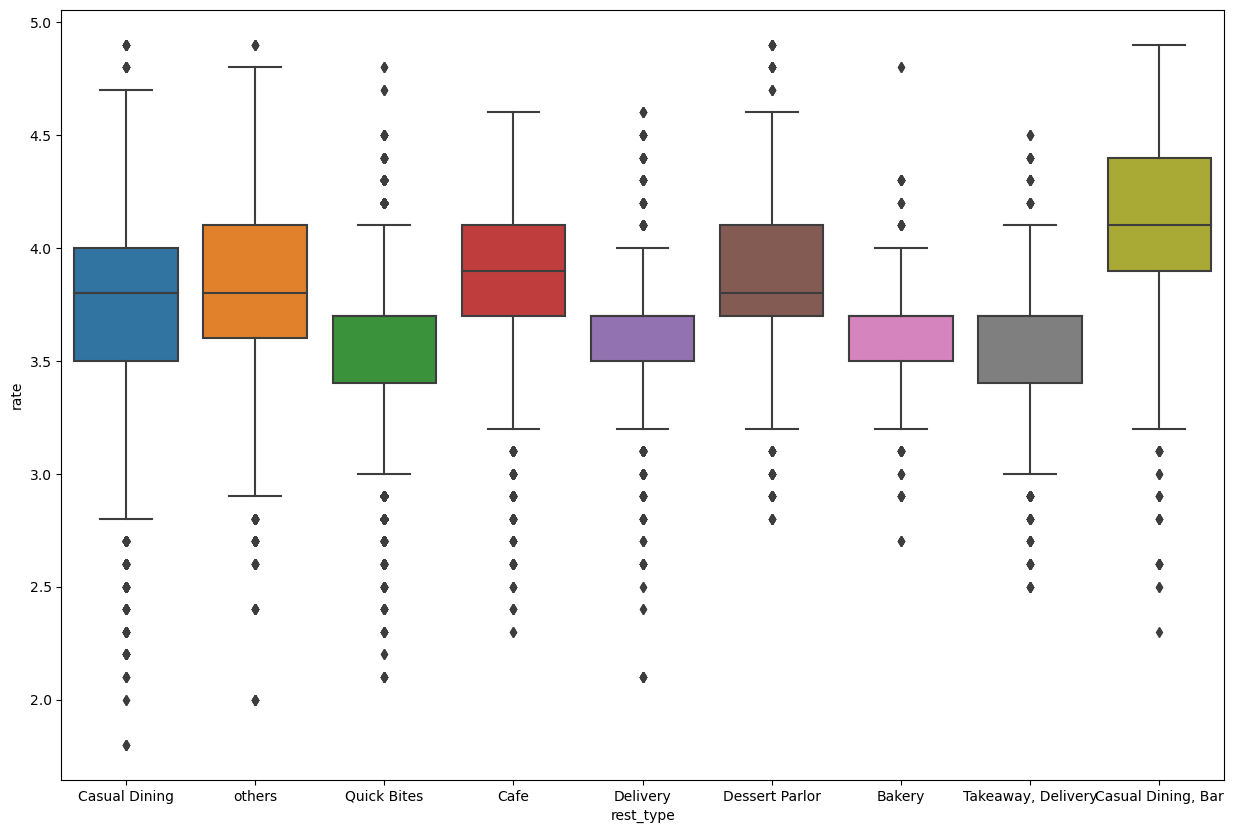

In [194]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = "rest_type",y = "rate",data = df,width = 0.8)


In [185]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plate,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [200]:
df4=df.groupby(["location","type"])["name"].count()
df4.to_csv("location_type.csv")
df4=pd.read_csv("location_type.csv")
df4=pd.pivot_table(df4,index = ["location"],columns = ["type"])
df4


name                                    \
type                  Buffet  Cafes Delivery Desserts Dine-out   
location                                                         
BTM                     21.0   83.0   3066.0    198.0   1662.0   
Banashankari             7.0   36.0    419.0     71.0    357.0   
Banaswadi                NaN   24.0    313.0     37.0    264.0   
Bannerghatta Road        9.0   46.0    828.0    137.0    580.0   
Basavanagudi             7.0   11.0    344.0     66.0    251.0   
Bellandur               28.0   36.0    620.0     75.0    479.0   
Brigade Road            25.0   46.0    504.0    108.0    455.0   
Brookefield              6.0   17.0    339.0     45.0    245.0   
Church Street           19.0   51.0    196.0     29.0    215.0   
Commercial Street        NaN   13.0    121.0     77.0    159.0   
Cunningham Road         29.0   34.0    195.0     26.0    184.0   
Domlur                  15.0   13.0    261.0     35.0    135.0   
Ejipura                  NaN    NaN    246.0     16.0    172.0   
Electronic City         23.0   24.0    572.0     71.0    516.0   
Frazer Town              1.0   11.0    476.0     56.0    172.0   
HSR                     19.0   49.0   1696.0    120.0    580.0   
Indiranagar             38.0   97.0   1093.0    140.0    532.0   
JP Nagar                45.0   76.0   1152.0    166.0    722.0   
Jayanagar               27.0   77.0   1043.0    182.0    575.0   
Kalyan Nagar             9.0   45.0    366.0     88.0    315.0   
Kammanahalli             2.0   27.0    330.0     35.0    240.0   
Koramangala 1st Block    3.0   26.0    717.0     70.0    398.0   
Koramangala 4th Block   21.0   53.0    464.0     81.0    302.0   
Koramangala 5th Block   65.0  146.0   1076.0    209.0    843.0   
Koramangala 6th Block   18.0   43.0    513.0     70.0    411.0   
Koramangala 7th Block   25.0   52.0    504.0    127.0    417.0   
Lavelle Road            30.0   27.0    129.0     50.0    193.0   
MG Road                 51.0   76.0    267.0     68.0    343.0   
Malleshwaram            11.0   31.0    272.0     85.0    291.0   
Marathahalli            34.0   32.0    980.0    105.0    631.0   
New BEL Road             4.0   29.0    338.0     33.0    224.0   
Old Airport Road        12.0    5.0    200.0     35.0    164.0   
Rajajinagar             10.0    4.0    258.0     55.0    251.0   
Residency Road          20.0   31.0    188.0     63.0    290.0   
Richmond Road           63.0   21.0    258.0     78.0    356.0   
Sarjapur Road           26.0   22.0    558.0     82.0    319.0   
Shanti Nagar             9.0   22.0    201.0     39.0    229.0   
Shivajinagar             6.0   17.0    144.0     37.0    280.0   
St. Marks Road           5.0   10.0    111.0     10.0    145.0   
Ulsoor                  16.0   56.0    462.0     71.0    359.0   
Whitefield              28.0   51.0   1045.0    137.0    768.0   
others                  84.0  133.0   2788.0    276.0   1559.0   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                 22.0          19.0  
Banashankari                        14.0           NaN  
Banaswadi                            6.0           1.0  
Bannerghatta Road                    9.0           2.0  
Basavanagudi                         5.0           NaN  
Bellandur                           17.0          16.0  
Brigade Road                        58.0          22.0  
Brookefield                          4.0           NaN  
Church Street                       36.0          23.0  
Commercial Street                    NaN           NaN  
Cunningham Road                     16.0           7.0  
Domlur                              12.0          11.0  
Ejipura                              NaN           NaN  
Electronic City                     21.0          21.0  
Frazer Town                          2.0           2.0  
HSR                        

<Axes: xlabel='location'>

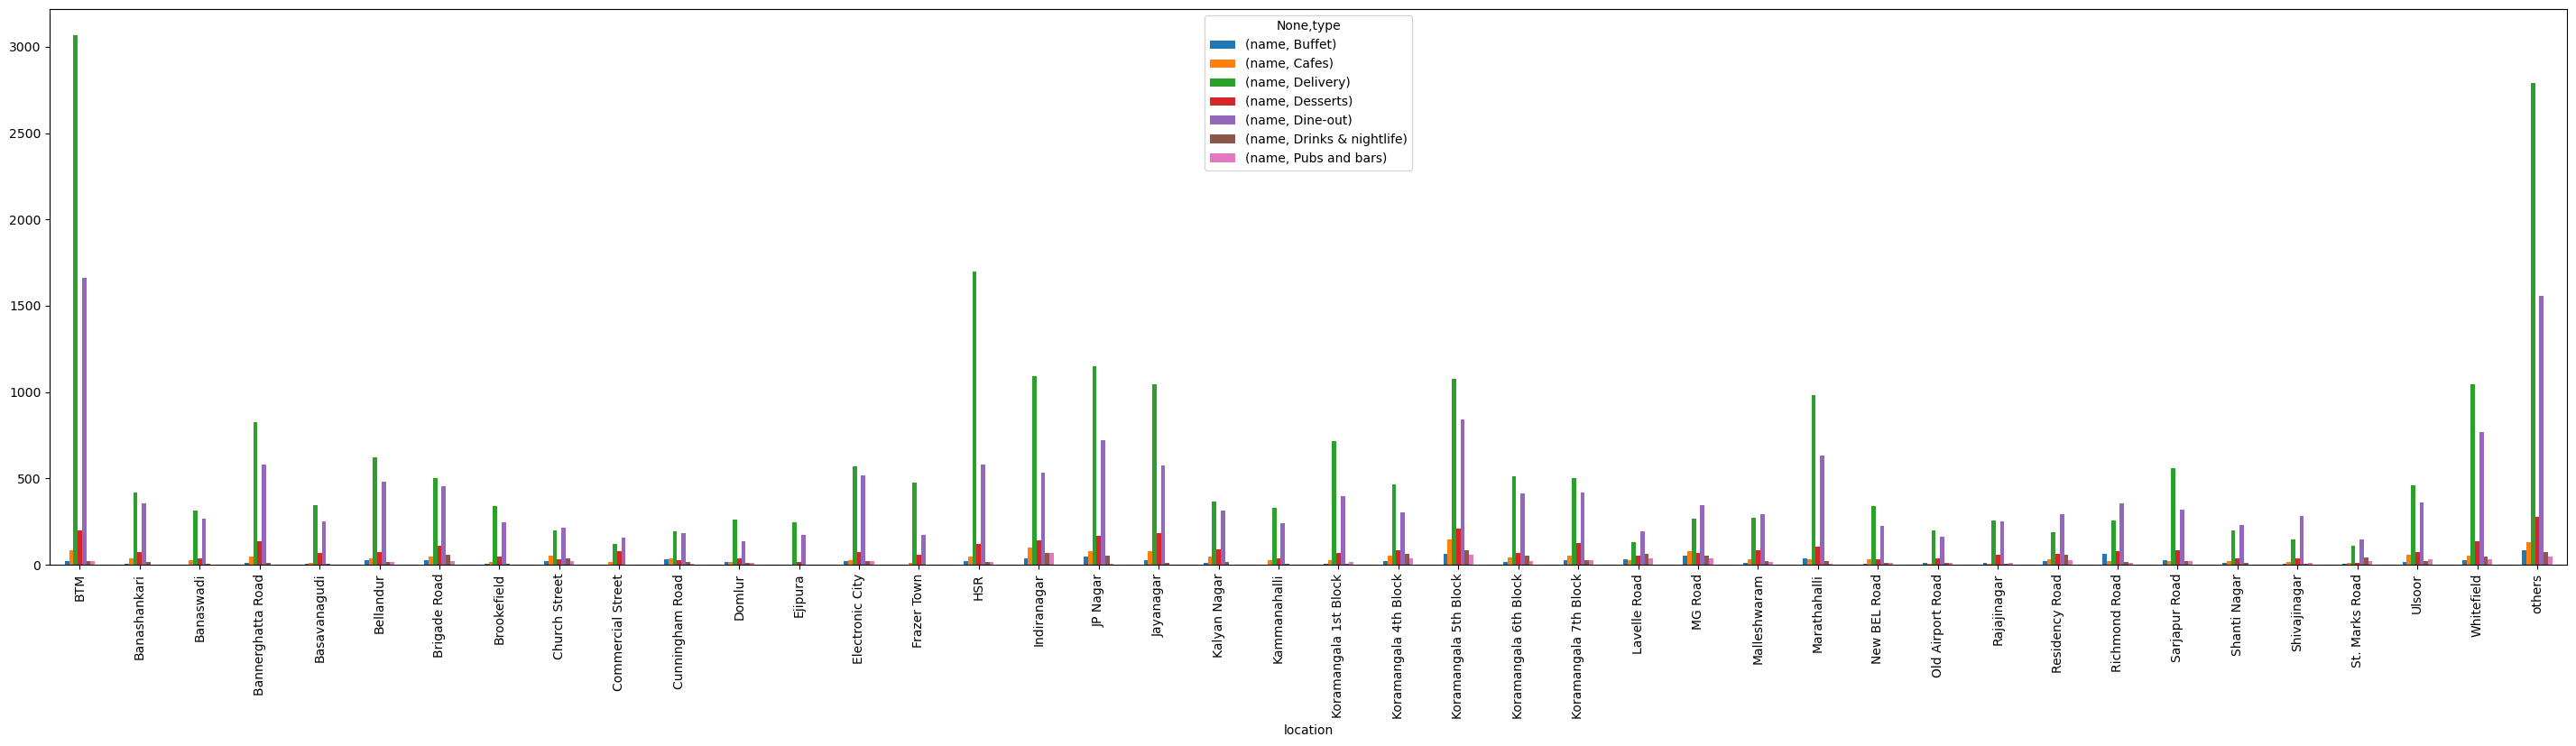

In [205]:

df4.plot(kind = "bar",figsize = (36,8))

In [207]:
df5 = df[['location', 'votes']]
df5.drop_duplicates()
df6 = df5.groupby(['location'])['votes'].sum()
df6 = df6.to_frame()
df6 = df6.sort_values('votes', ascending=False)
df6.head()

,votes
location,
Koramangala 5th Block,2214827
Indiranagar,1172729
Koramangala 4th Block,685156
Church Street,594979
JP Nagar,586522


In [208]:
df6

,votes
location,
Koramangala 5th Block,2214827
Indiranagar,1172729
Koramangala 4th Block,685156
Church Street,594979
JP Nagar,586522
BTM,574058
others,565657
Lavelle Road,505460
HSR,498772
